In [1]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc

from os import listdir
from os.path import isfile, join

%cd ..
from src import sw3c, evolution_simulator 

/home/mounim/PHD-Projects/BiNGO-3C/notebooks


In [46]:
seqs = {}
k = 11
w = 5
for k in [6,7,9,11,15,20,30,40,50]:
    for w in range(1,k,2):
        for i in range(100,1100,10):
            seq = evolution_simulator.generate_random_seq(i)
            seqs[str(k)+'_'+str(w)+'_'+str(i)] = seq
print(len(seqs))

9200


In [37]:

def getKmersSeq(sequence:str, k, step):
    kmers = [] 
    start = 0
    end = k
    #window = k - step
    while end < len(sequence):
        kmers.append(sequence[start:end])
        start = start + step
        end = end + step
    return kmers
    
### Compression:
# input: sub-sequence: AT
# output: binary version: 0011
def binarization(seq):
    map = {'A':'00','C':'01','G':'10','T':'11'}
    binare = seq
    for ch, bi in map.items():
        binare = binare.upper().replace(ch, bi)
    binare = ''.join([c for c in binare if c in '01']) # remove any other char
    if len(binare)<1:
        return 'A'
    return int(binare, base=2)

# input: list of sub-sequences
# output: list of binary values
def binarize_a_list(lst):
    return [ binarization(e) for e in lst]


def dictKmer_from_DictSubseq(dictSubSeq, k = 11, step = 1): 
    dictKmer = {}
    for key, subsequences in dictSubSeq.items():
        dictKmer[key] = set()
        kmers= []
        for subSeq in [subsequences]:
            kemerSeq = getKmersSeq(subSeq, k, step)
            if kemerSeq not in kmers:
                kmers += kemerSeq
        bin = binarize_a_list(kmers)
        dictKmer[key]|= set(bin) # change to binary representation
    return dictKmer

In [ ]:
All_dictKmers

In [200]:
k = 11
w = 5
All_dictKmers = {}
delim = sw3c.random_delimiter(5) #select delimiter
for k in [5,11,50]:
    Ws = [1, 7, 25]
    # Ws = [ x for x in Ws if x < k]
    for w in Ws:
        if 1:
            seqs = {}
            for i in range(50,250,1):
                seq = evolution_simulator.generate_random_seq(i)
                seqs[str(k)+'_'+str(w)+'_'+str(i)] = seq
                dicSubseqs = sw3c.dictSubSeq_from_dictSeq(seqs, delim) #remake seqs using delim
                dictKmers = dictKmer_from_DictSubseq(seqs, k, w) # make chunks
                All_dictKmers.update(dictKmers)

In [201]:
rows = {}
for key, val in All_dictKmers.items():
    row = []
    row+= key.split('_')
    row+= [len(val)]
    rows[key] = row
df = pd.DataFrame(rows).T
df.columns = ['word size','gap','sequence lenght','words']
print(df)
df['sequence lenght'] = df['sequence lenght'].astype('int')
df['words'] = df['words'].astype('int')
df['word size'] = df['word size'].astype('int')
df['Bin'] = df['words']*df['word size']
df['size'] = df['sequence lenght']*8
df

          word size gap sequence lenght words
5_1_50            5   1              50    44
5_1_51            5   1              51    45
5_1_52            5   1              52    47
5_1_53            5   1              53    47
5_1_54            5   1              54    46
...             ...  ..             ...   ...
50_25_245        50  25             245     8
50_25_246        50  25             246     8
50_25_247        50  25             247     8
50_25_248        50  25             248     8
50_25_249        50  25             249     8

[1800 rows x 4 columns]


,word size,gap,sequence lenght,words,Bin,size
5_1_50,5,1,50,44,220,400
5_1_51,5,1,51,45,225,408
5_1_52,5,1,52,47,235,416
5_1_53,5,1,53,47,235,424
5_1_54,5,1,54,46,230,432
...,...,...,...,...,...,...
50_25_245,50,25,245,8,400,1960
50_25_246,50,25,246,8,400,1968
50_25_247,50,25,247,8,400,1976
50_25_248,50,25,248,8,400,1984


<AxesSubplot:xlabel='sequence lenght', ylabel='words'>

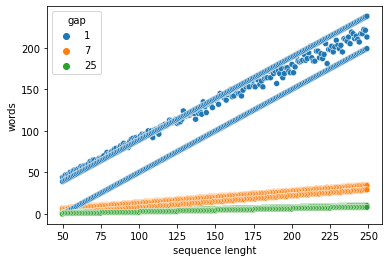

In [202]:
sns.scatterplot(x = df['sequence lenght'] , y = df['words'], hue= df['gap'])

/home/mounim/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


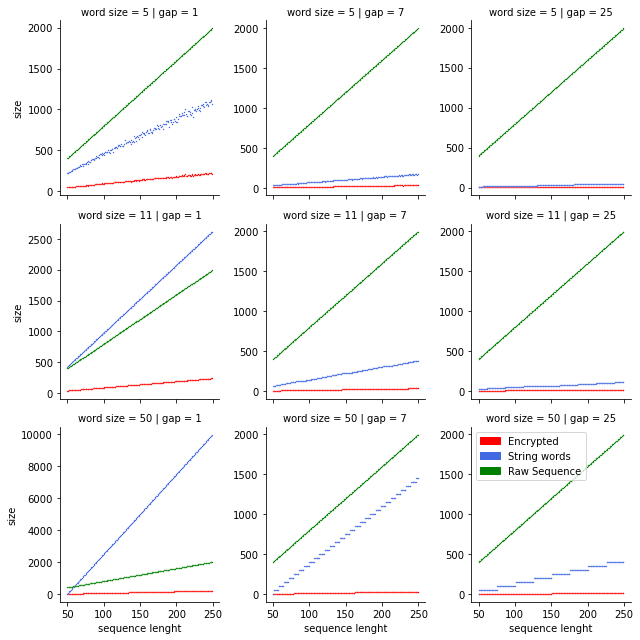

In [214]:
# encoded
g = sns.FacetGrid(df ,'word size' , 'gap', col=9, sharey=False)
g.map(sns.scatterplot, "sequence lenght", "words", color='red',s=2)
g.map(sns.scatterplot, "sequence lenght", "Bin", color='royalblue',s=2)
g.map(sns.scatterplot, "sequence lenght", "size", color='green',s=2)


import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='Encrypted')
plt.legend(handles=[])

blue_patch = mpatches.Patch(color='royalblue', label='String words')

green_patch = mpatches.Patch(color='green', label='Raw Sequence')
plt.legend(handles=[red_patch, blue_patch ,green_patch], loc='upper left')



/home/mounim/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


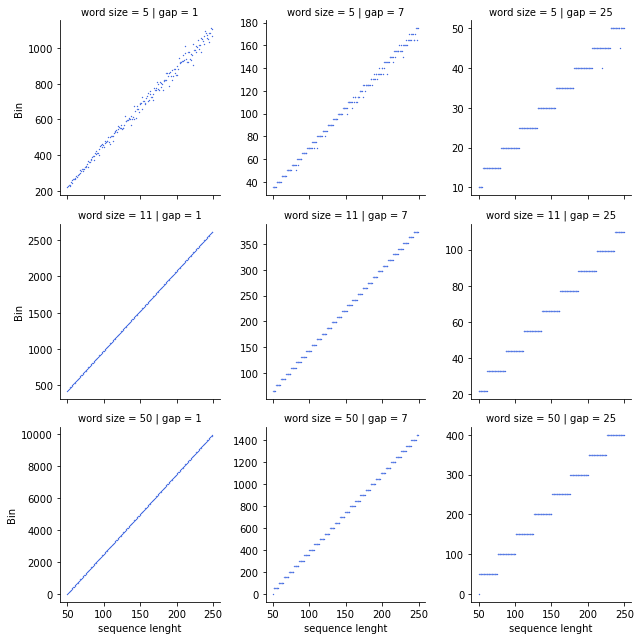

In [204]:
# encoded
g = sns.FacetGrid(df ,'word size' , 'gap', col=9, sharey=False)
g.map(sns.scatterplot, "sequence lenght", "Bin", color='royalblue',s=2)

